In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import imblearn
from sklearn.feature_selection import RFECV

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

pd.set_option('display.max_columns', None)
df= pd.read_csv(r'C:\Users\yashd\Desktop\ds\Startup\EDA on Finance Data\startup_funding.csv',index_col=0)

In [3]:
df.head()

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
Sr No,,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [4]:
df

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
Sr No,,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...
3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3044 entries, 1 to 3044
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date dd/mm/yyyy    3044 non-null   object
 1   Startup Name       3044 non-null   object
 2   Industry Vertical  2873 non-null   object
 3   SubVertical        2108 non-null   object
 4   City  Location     2864 non-null   object
 5   Investors Name     3020 non-null   object
 6   InvestmentnType    3040 non-null   object
 7   Amount in USD      2084 non-null   object
 8   Remarks            419 non-null    object
dtypes: object(9)
memory usage: 237.8+ KB


In [6]:
df.drop('Remarks', axis=1, inplace=True)

In [7]:
df

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"
...,...,...,...,...,...,...,...,...
3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000"
3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000"
3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date dd/mm/yyyy    3044 non-null   object
 1   Startup Name       3044 non-null   object
 2   Industry Vertical  2873 non-null   object
 3   SubVertical        2108 non-null   object
 4   City  Location     2864 non-null   object
 5   Investors Name     3020 non-null   object
 6   InvestmentnType    3040 non-null   object
 7   Amount in USD      2084 non-null   object
dtypes: object(8)
memory usage: 214.0+ KB


In [9]:
df.columns = ["Date", "StartupName", "IndustryVertical", "SubVertical",
                        "City", "InvestorsName", "InvestmentType", "AmountInUSD"] 


In [10]:
df.head()

,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [11]:

def remove_string(x):
    return str(x).replace("\\xc2\\xa0","").replace("\\\\xc2\\\\xa0", "")


for col in ["StartupName", "IndustryVertical", "SubVertical", "City", 
            "InvestorsName", "InvestmentType", "AmountInUSD",]:
    df[col] = df[col].apply(lambda x: remove_string(x))
   


In [12]:
df["AmountInUSD"]=df["AmountInUSD"].str.replace(",","")
df["AmountInUSD"]=df["AmountInUSD"].str.replace("undisclosed","")
df["AmountInUSD"]=df["AmountInUSD"].str.replace("unknown","")
df["AmountInUSD"]=df["AmountInUSD"].str.replace("unknown","")
df["AmountInUSD"]=df["AmountInUSD"].str.replace("Undisclosed","")
df["AmountInUSD"]=df["AmountInUSD"].str.replace("+","")
df["AmountInUSD"]=df["AmountInUSD"].str.replace("nan","")
df["AmountInUSD"]=df["AmountInUSD"].str.replace("N/A","")
df["AmountInUSD"]=pd.to_numeric(df["AmountInUSD"])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3044 non-null   object 
 1   StartupName       3044 non-null   object 
 2   IndustryVertical  3044 non-null   object 
 3   SubVertical       3044 non-null   object 
 4   City              3044 non-null   object 
 5   InvestorsName     3044 non-null   object 
 6   InvestmentType    3044 non-null   object 
 7   AmountInUSD       2073 non-null   float64
dtypes: float64(1), object(7)
memory usage: 214.0+ KB


In [14]:
df['AmountInUSD'].fillna(0 , inplace = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3044 non-null   object 
 1   StartupName       3044 non-null   object 
 2   IndustryVertical  3044 non-null   object 
 3   SubVertical       3044 non-null   object 
 4   City              3044 non-null   object 
 5   InvestorsName     3044 non-null   object 
 6   InvestmentType    3044 non-null   object 
 7   AmountInUSD       3044 non-null   float64
dtypes: float64(1), object(7)
memory usage: 214.0+ KB


In [16]:
df['Date'][df['Date']=='12/05.2015'] = '12/05/2015'
df['Date'][df['Date']=='13/04.2015'] = '13/04/2015'
df['Date'][df['Date']=='15/01.2015'] = '15/01/2015'
df['Date'][df['Date']=='22/01//2015'] = '22/01/2015'
df['Date'][df['Date']=='05/072018'] = '05/07/2018'
df['Date'][df['Date']=='01/07/015'] = '01/07/2015'
df['Date'][df['Date']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'

In [17]:
df['IndustryVertical'] = df['IndustryVertical'].replace('nan', 'Consumer Technology')

In [18]:
df['City'] = df['City'].replace(('Bengaluru', 'nan'),('Bangalore', 'Bangalore'))

In [19]:
df['InvestorsName'][df['InvestorsName'] == 'Undisclosed investors'] = 'Undisclosed Investors'
df['InvestorsName'][df['InvestorsName'] == 'undisclosed Investors'] = 'Undisclosed Investors'
df['InvestorsName'][df['InvestorsName'] == 'undisclosed investors'] = 'Undisclosed Investors'
df['InvestorsName'][df['InvestorsName'] == 'Undisclosed investor'] = 'Undisclosed Investors'
df['InvestorsName'][df['InvestorsName'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
df['InvestorsName'][df['InvestorsName'] == 'Undisclosed'] = 'Undisclosed Investors'
df['InvestorsName'][df['InvestorsName'] == 'nan'] = 'Undisclosed Investors'


In [20]:
df['InvestmentType'][df['InvestmentType'] == 'SeedFunding'] = 'Seed Funding'
df['InvestmentType'][df['InvestmentType'] == 'Crowd funding'] = 'Crowd Funding'
df['InvestmentType'][df['InvestmentType'] == 'PrivateEquity'] = 'Private Equity'

In [21]:
df

,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity Round,200000000.0
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,18358860.0
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0
...,...,...,...,...,...,...,...,...
3040,29/01/2015,Printvenue,Consumer Technology,nan,Bangalore,Asia Pacific Internet Group,Private Equity,4500000.0
3041,29/01/2015,Graphene,Consumer Technology,nan,Bangalore,KARSEMVEN Fund,Private Equity,825000.0
3042,30/01/2015,Mad Street Den,Consumer Technology,nan,Bangalore,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000.0


In [22]:
stat=df.copy()

## LOCATION OF STARTUPS ON THE BASIS OF CITIES WITH NUMBER OF FUNDING

Bangalore     1022
Mumbai         568
New Delhi      424
Gurgaon        291
Pune           105
Hyderabad       99
Chennai         97
Noida           93
Gurugram        50
Ahmedabad       38
Delhi           34
Jaipur          30
Kolkata         21
Indore          13
Chandigarh      11
Name: City, dtype: int64


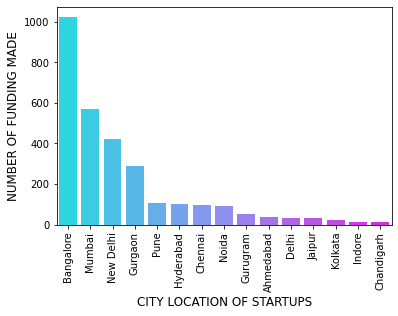

In [23]:
city = stat['City'].value_counts().head(15)
print(city)


sns.barplot(city.index, city.values, palette = 'cool',)
plt.rcParams['figure.figsize'] = (12,10)
plt.xticks(rotation='vertical')
plt.xlabel('CITY LOCATION OF STARTUPS', fontsize=12)
plt.ylabel('NUMBER OF FUNDING MADE', fontsize=12)

plt.show()

<AxesSubplot:ylabel='City'>

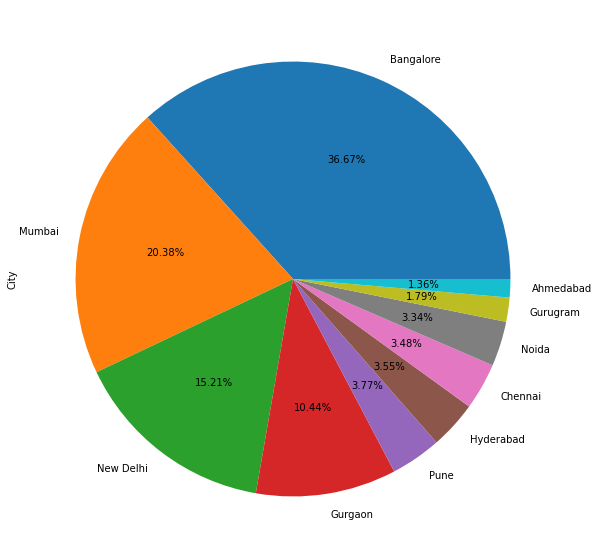

In [24]:
stat['City'].value_counts().head(10).plot(kind='pie',autopct="%1.2f%%",figsize=[25,10])

## MORE PREFERRED INDUSTRIES FOR STARTUPS

Consumer Internet      941
Technology             478
eCommerce              186
Consumer Technology    172
Healthcare              70
Finance                 62
ECommerce               61
Logistics               32
E-Commerce              29
Education               24
Name: IndustryVertical, dtype: int64


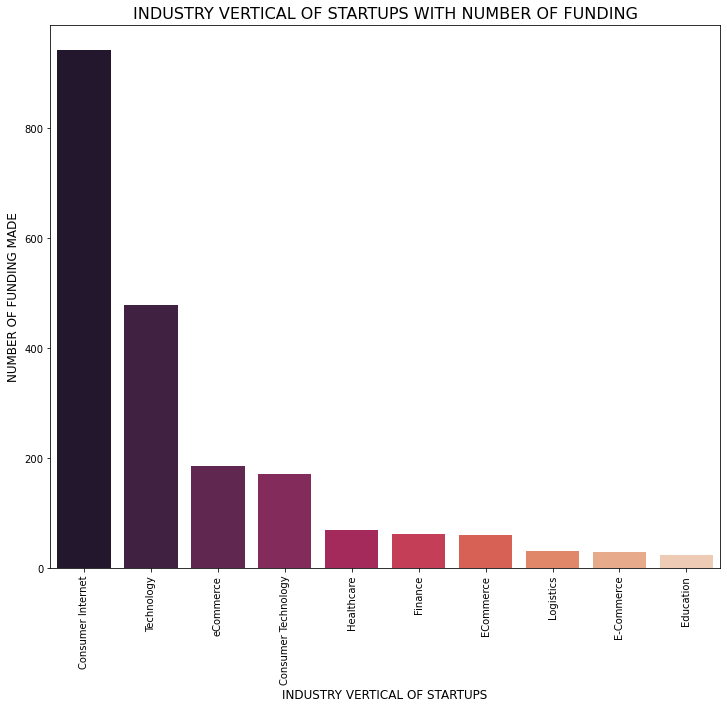

In [25]:
industry = stat['IndustryVertical'].value_counts().head(10)
print(industry)



sns.barplot(industry.index, industry.values, palette = 'rocket')
plt.xticks(rotation='vertical')
plt.xlabel('INDUSTRY VERTICAL OF STARTUPS', fontsize=12)
plt.ylabel('NUMBER OF FUNDING MADE', fontsize=12)
plt.title("INDUSTRY VERTICAL OF STARTUPS WITH NUMBER OF FUNDING", fontsize=16)

plt.show()

<AxesSubplot:ylabel='IndustryVertical'>

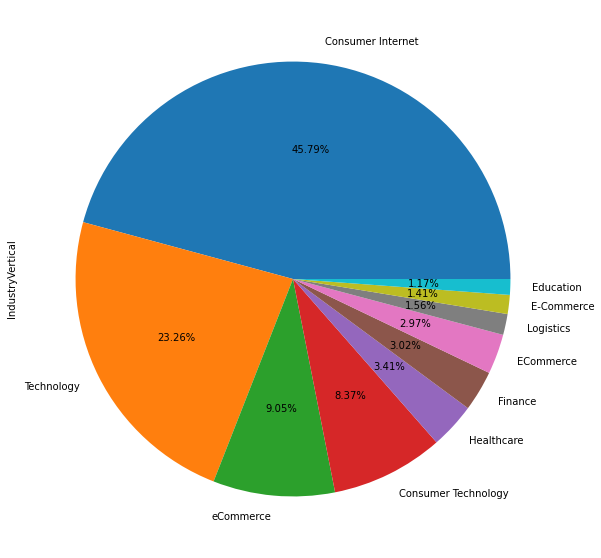

In [26]:
stat['IndustryVertical'].value_counts().head(10).plot(kind='pie',autopct="%1.2f%%",figsize=[25,10])

## DISTRIBUTION ON THE BASIS OF INVESTMENT TYPE

<AxesSubplot:ylabel='InvestmentType'>

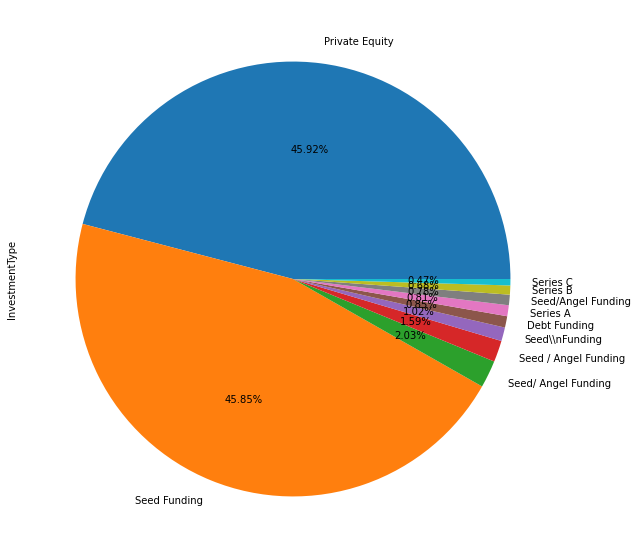

In [27]:
stat['InvestmentType'].value_counts().head(10).plot(kind='pie',autopct="%1.2f%%",figsize=[25,10])

<AxesSubplot:>

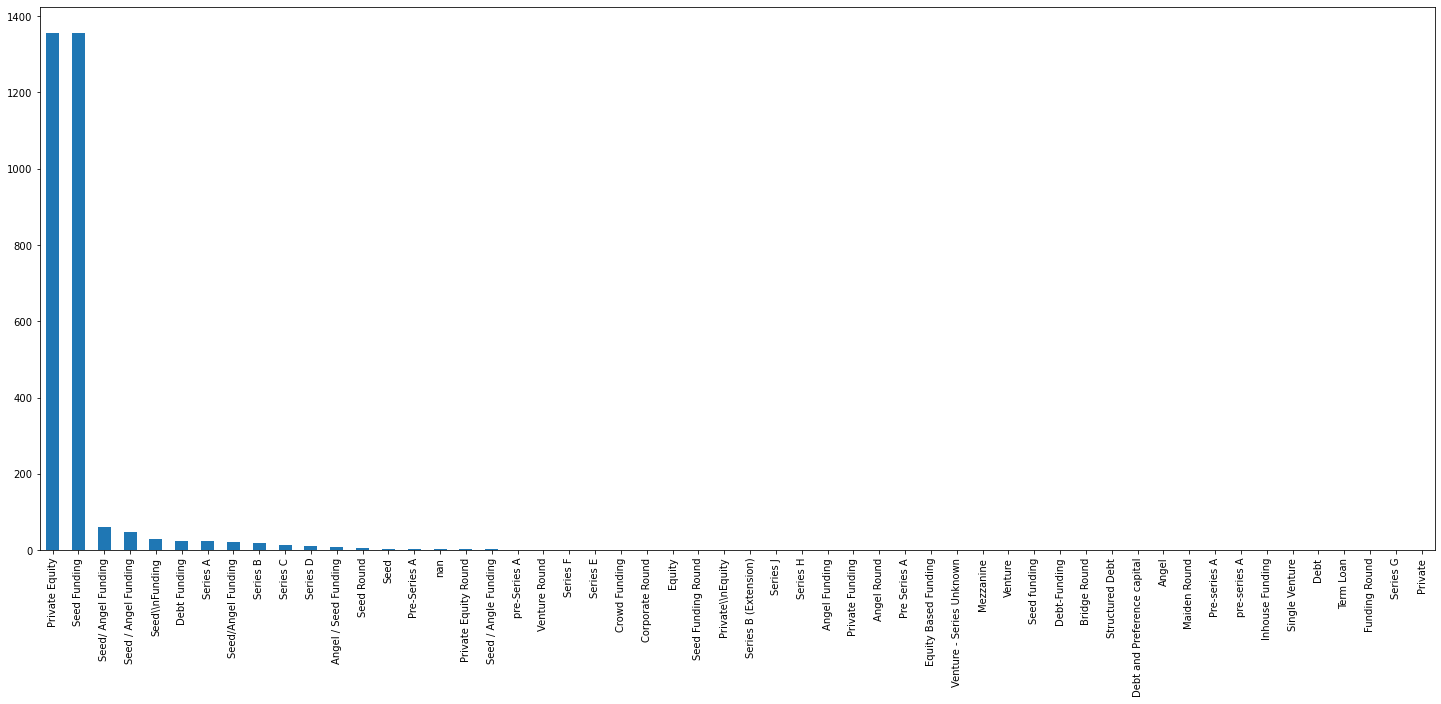

In [28]:
stat['InvestmentType'].value_counts().plot(kind='bar', figsize=[25,10])

## TOP 30 STARTUPS WITH HIGHEST AMOUNT

In [29]:
stat.sort_values(by='AmountInUSD', ascending=False)[['StartupName','City','AmountInUSD']][:30]

,StartupName,City,AmountInUSD
Sr No,,,
61,Rapido Bike Taxi,Bangalore,3.900000e+09
652,Flipkart,Bangalore,2.500000e+09
967,Flipkart,Bangalore,1.400000e+09
831,Paytm,Bangalore,1.400000e+09
32,Paytm,Noida,1.000000e+09
2649,Flipkart.com,Bangalore,7.000000e+08
2460,Paytm,New Delhi,6.800000e+08
189,True North,Mumbai,6.000000e+08
34,Udaan,Bangalore,5.850000e+08


# PROMOTION PREDICTION

In [30]:
plt.rcParams['figure.figsize'] = (16, 5)
plt.style.use('fivethirtyeight')

In [31]:
train = pd.read_csv(r'C:\Users\yashd\Desktop\ds\Employee + promotion\employee+promotion\train.csv')
test = pd.read_csv(r'C:\Users\yashd\Desktop\ds\Employee + promotion\employee+promotion\test.csv')

In [32]:
print("Shape of the Training Data :", train.shape)
print("Shape of the Test Data :", test.shape)

Shape of the Training Data : (54808, 14)
Shape of the Test Data : (23490, 13)


In [33]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [34]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [36]:
train_total = train.isnull().sum()

In [37]:
train_percent = ((train.isnull().sum()/train.shape[0])*100).round(2)

In [38]:
test_total = test.isnull().sum()

In [39]:
test_percent = ((test.isnull().sum()/test.shape[0])*100).round(2)

In [40]:
train_missing_data = pd.concat([train_total, train_percent, test_total, test_percent],
                                axis=1, 
                                keys=['Train_Total', 'Train_Percent %','Test_Total', 'Test_Percent %'],
                                sort = True)

In [41]:
train_missing_data.style.bar(color = ['gold'])

,Train_Total,Train_Percent %,Test_Total,Test_Percent %
KPIs_met >80%,0,0.000000,0.000000,0.000000
age,0,0.000000,0.000000,0.000000
avg_training_score,0,0.000000,0.000000,0.000000
awards_won?,0,0.000000,0.000000,0.000000
department,0,0.000000,0.000000,0.000000
education,2409,4.400000,1034.000000,4.400000
employee_id,0,0.000000,0.000000,0.000000
gender,0,0.000000,0.000000,0.000000
is_promoted,0,0.000000,nan,nan
length_of_service,0,0.000000,0.000000,0.000000


In [42]:
train['education'] = train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [45]:
test['education'] = test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])

In [46]:
print("Number of Missing Values Left in the Training Data :", test.isnull().sum().sum())
print("Number of Missing Values Left in the Training Data :", train.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0
Number of Missing Values Left in the Training Data : 0


In [47]:
train.select_dtypes('number').head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0


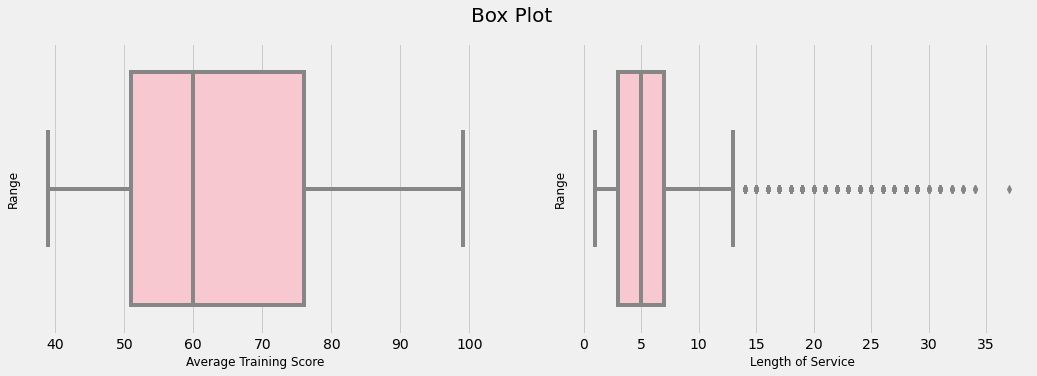

In [48]:
# lets check the boxplots for the columns where we suspect for outliers
plt.subplot(1, 2, 1)
sns.boxplot(train['avg_training_score'], color = 'pink')
plt.xlabel('Average Training Score', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.subplot(1, 2, 2)
sns.boxplot(train['length_of_service'], color = 'pink')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Box Plot', fontsize = 20)
plt.show()

In [49]:
train = train[train['length_of_service'] > 13]

In [95]:
train['is_promoted']

13       0
42       0
60       1
74       0
99       0
        ..
54691    0
54695    1
54697    0
54754    0
54803    0
Name: is_promoted, Length: 3489, dtype: int64

<AxesSubplot:ylabel='is_promoted'>

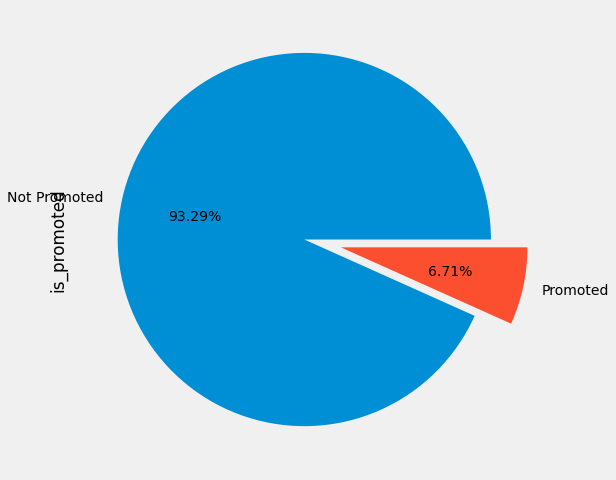

In [97]:
train['is_promoted'].value_counts().plot(kind='pie',labels = ['Not Promoted', 'Promoted'],autopct="%1.2f%%", explode=[0,0.2], figsize=[10,8])

## Univariate Analysis

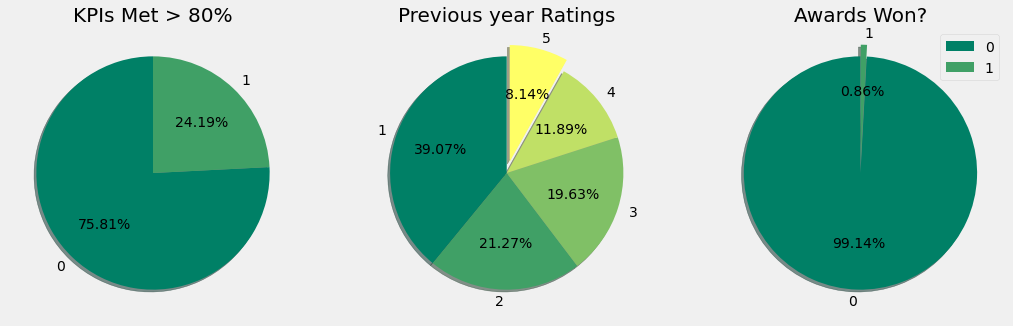

In [50]:
# lets plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,5)
plt.style.use('fivethirtyeight')

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 1)
labels = ['0','1']
sizes = train['KPIs_met >80%'].value_counts()
colors = plt.cm.summer(np.linspace(0, 1, 5))
explode = [0, 0]

plt.pie(sizes, labels = labels,autopct="%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('KPIs Met > 80%', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 2)
labels = ['1', '2', '3', '4', '5']
sizes = train['previous_year_rating'].value_counts()
colors = plt.cm.summer(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(sizes, labels = labels ,autopct="%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Previous year Ratings', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 3)
labels = ['0', '1']
sizes = train['awards_won?'].value_counts()
colors = plt.cm.summer(np.linspace(0, 1, 5))
explode = [0,0.1]

plt.pie(sizes, labels = labels,autopct="%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Awards Won?', fontsize = 20)


plt.legend()
plt.show()

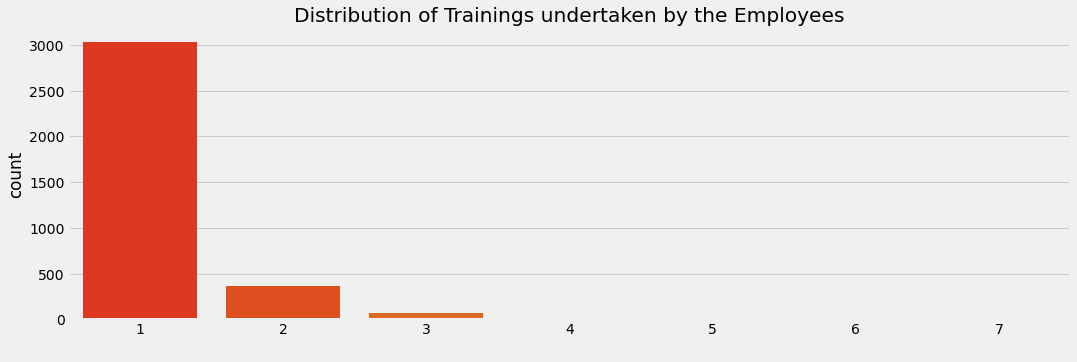

In [51]:
# lets check the distribution of trainings undertaken by the employees

plt.rcParams['figure.figsize'] = (16,5)
sns.countplot(train['no_of_trainings'], palette = 'autumn')
plt.xlabel(' ', fontsize = 14)
plt.title('Distribution of Trainings undertaken by the Employees')
plt.show()

## AGE DISTRIBUTION OF EMPLOYEES

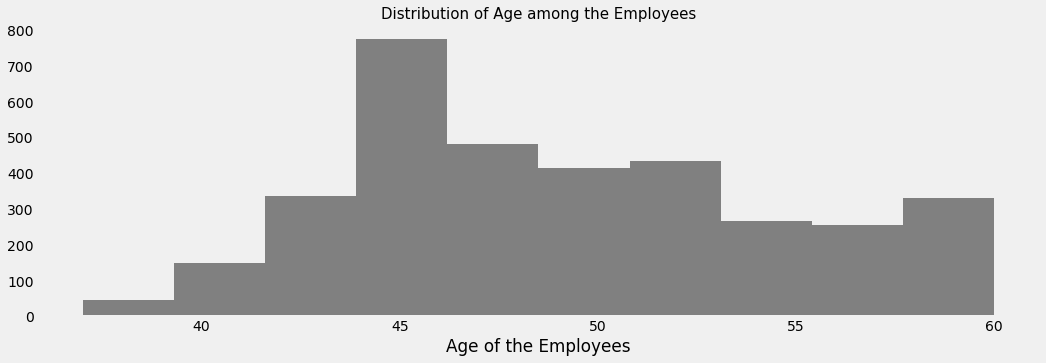

In [52]:
plt.hist(train['age'], color = 'grey')
plt.title('Distribution of Age among the Employees', fontsize = 15)
plt.xlabel('Age of the Employees')
plt.grid()
plt.show()

## DISTRIBUTION ON THE BASIS OF DEPARTMENTS

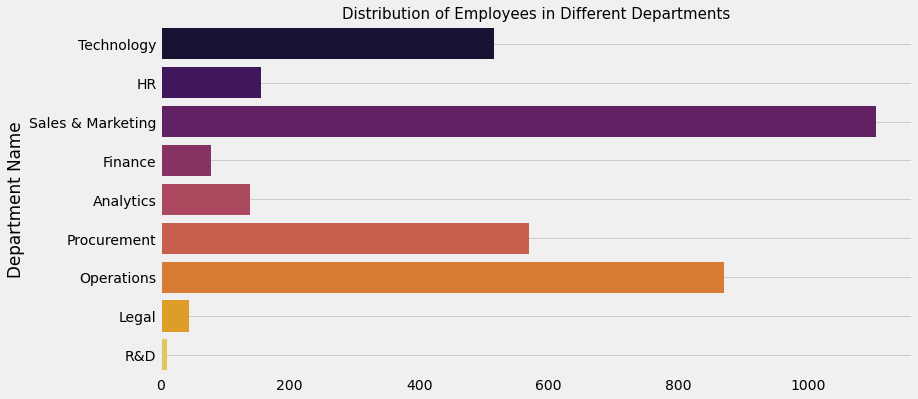

In [53]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.countplot(y = train['department'], palette = 'inferno', orient = 'v')
plt.xlabel('')
plt.ylabel('Department Name')
plt.title('Distribution of Employees in Different Departments', fontsize = 15)
plt.grid()

plt.show()

## DISTRIBUTION ON THE BASIS OF REGIONS

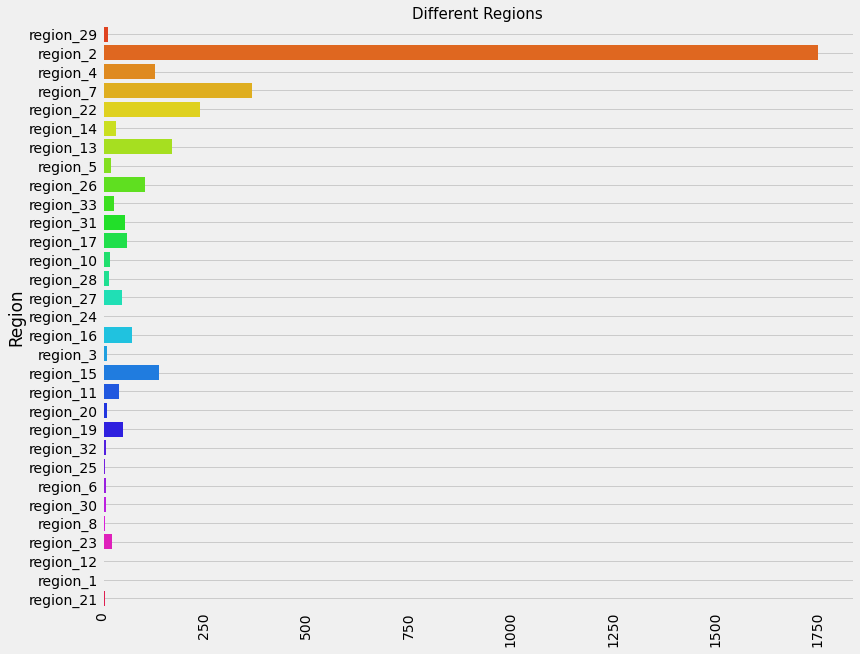

In [54]:
plt.rcParams['figure.figsize'] = (12,10)
plt.style.use('fivethirtyeight')
sns.countplot(y = train['region'], palette = 'hsv', orient = 'v')
plt.xlabel('')
plt.ylabel('Region')
plt.title('Different Regions', fontsize = 15)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

## DISTRIBUTION ON THE BASIS OF GENDER

Text(0.5, 1.0, 'Gender')

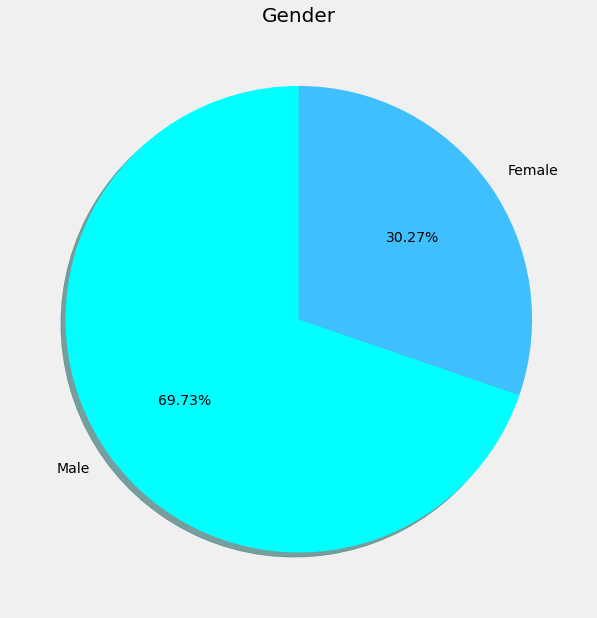

In [55]:
plt.rcParams['figure.figsize'] = (10, 10)
sizes = train['gender'].value_counts()
colors = plt.cm.cool(np.linspace(0, 1, 5))
explode = [0, 0]

plt.pie(sizes, labels = ['Male', 'Female'], colors = colors,autopct="%1.2f%%", explode = explode, shadow = True, startangle = 90)
plt.title('Gender', fontsize = 20)


## DISTRIBUTION ON THE BASIS OF EDUCATION

Text(0.5, 1.0, 'Education')

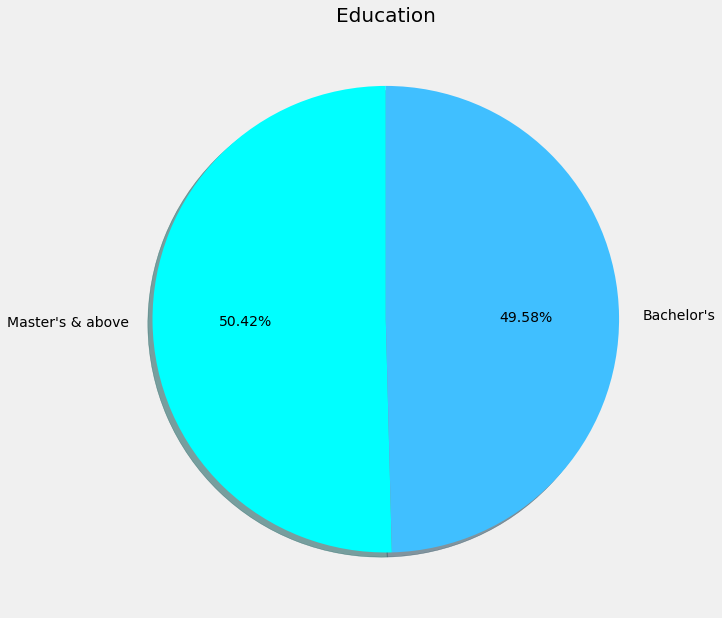

In [56]:
plt.rcParams['figure.figsize'] = (10, 10)
labels = train['education'].value_counts().index
sizes = train['education'].value_counts()
colors = plt.cm.cool(np.linspace(0, 1, 5))


plt.pie(sizes, labels = labels, colors = colors,autopct="%1.2f%%",  shadow = True, startangle = 90)
plt.title('Education', fontsize = 20)

## DISTRIBUTION ON THE BASIS OF RECRUITMENT CHANNEL

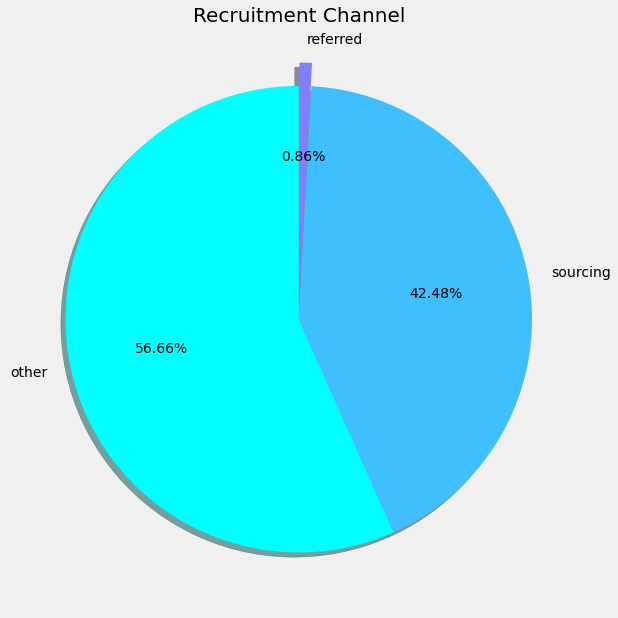

In [57]:
plt.rcParams['figure.figsize'] = (10, 10)
labels = train['recruitment_channel'].value_counts().index
sizes = train['recruitment_channel'].value_counts()
colors = plt.cm.cool(np.linspace(0, 1, 5))
explode = [0,0,0.1]

plt.pie(sizes, labels = labels, colors = colors,autopct="%1.2f%%", explode = explode, shadow = True, startangle = 90)
plt.title('Recruitment Channel', fontsize = 20)

plt.show()

## Bivariate Analysis

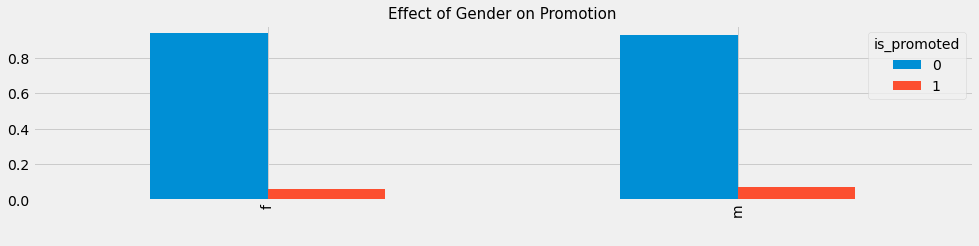

In [58]:
# Lets compare the Gender Gap in the promotion

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 3)
x = pd.crosstab(train['gender'], train['is_promoted'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False, )
plt.title('Effect of Gender on Promotion', fontsize = 15)
plt.xlabel(' ')
plt.show()

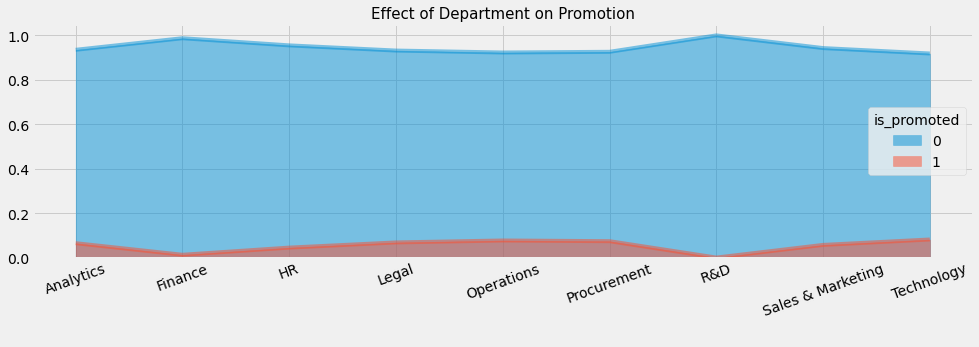

In [59]:
# lets compare the effect of different Departments and Promotion

plt.rcParams['figure.figsize'] = (15,4)
x = pd.crosstab(train['department'], train['is_promoted'])
colors = plt.cm.copper(np.linspace(0, 1, 3))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'area', stacked = False, )
plt.title('Effect of Department on Promotion', fontsize = 15)
plt.xticks(rotation = 20)
plt.xlabel(' ')
plt.show()

## Effect of Age on the Promotion

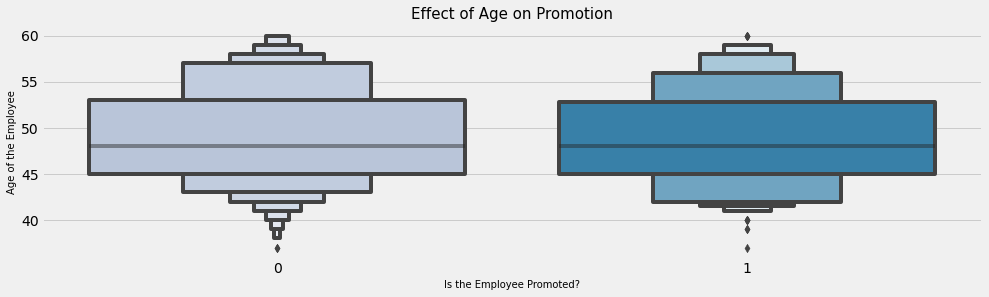

In [60]:

plt.rcParams['figure.figsize'] = (15,4)
sns.boxenplot(train['is_promoted'], train['age'], palette = 'PuBu')
plt.title('Effect of Age on Promotion', fontsize = 15)
plt.xlabel('Is the Employee Promoted?', fontsize = 10)
plt.ylabel('Age of the Employee', fontsize = 10)
plt.show()

## Department Vs Average Training Score

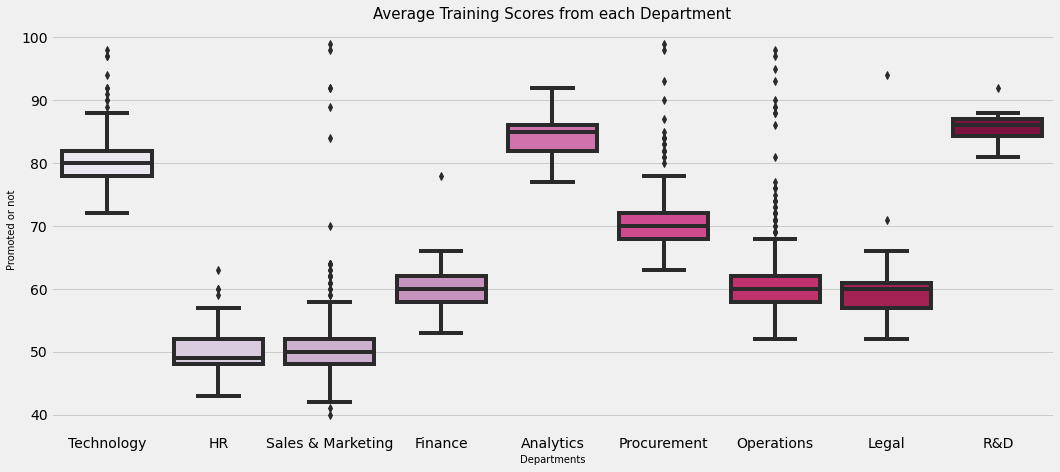

In [61]:
plt.rcParams['figure.figsize'] = (16, 7)
sns.boxplot(train['department'], train['avg_training_score'], palette = 'PuRd')
plt.title('Average Training Scores from each Department', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

## Multivariate Analysis

### Heat Map for the Data with respect to correlation.

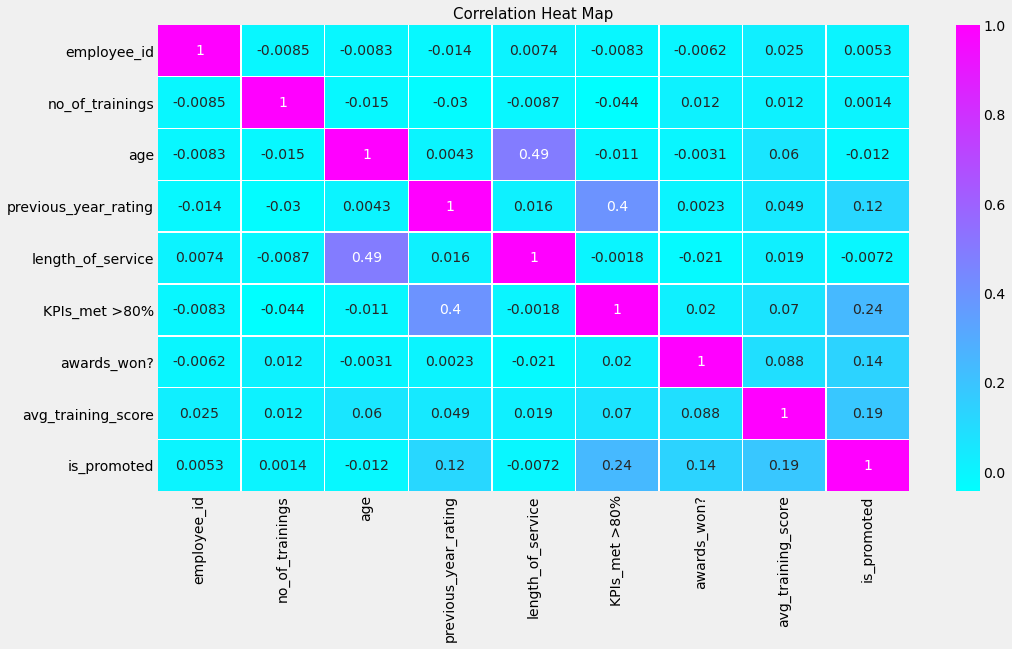

In [62]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(train.corr(), annot = True, linewidth = 0.5, cmap = 'cool')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

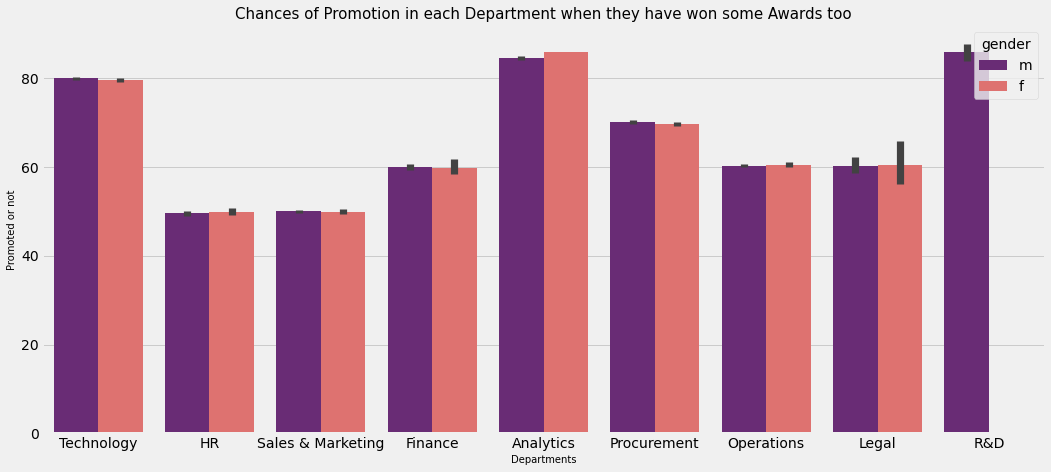

In [63]:
# lets check the relation of Departments and Promotions when they won awards ?

plt.rcParams['figure.figsize'] = (16, 7)
sns.barplot(train['department'], train['avg_training_score'], hue = train['gender'], palette = 'magma')
plt.title('Chances of Promotion in each Department when they have won some Awards too', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

In [64]:
# lets create some extra features from existing features to improve our Model

# creating a Metric of Sum
train['sum_metric'] = train['awards_won?']+train['KPIs_met >80%'] + train['previous_year_rating']
test['sum_metric'] = test['awards_won?']+test['KPIs_met >80%'] + test['previous_year_rating']

# creating a total score column
train['total_score'] = train['avg_training_score'] * train['no_of_trainings']
test['total_score'] = test['avg_training_score'] * test['no_of_trainings']

In [65]:
# lets remove some of the columns which are not very useful for predicting the promotion.

# we already know that the recruitment channel is very least related to promotion of an employee, so lets remove this column
# even the region seems to contribute very less, when it comes to promotion, so lets remove it too.
# also the employee id is not useful so lets remove it.

train = train.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)
test = test.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)

In [66]:
train.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
13,Technology,Master's & above,m,2,39,3.0,16,0,0,80,0,3.0,160
42,HR,Bachelor's,m,1,59,4.0,26,1,0,52,0,5.0,52
60,Sales & Marketing,Master's & above,m,1,50,4.0,17,1,0,47,1,5.0,47
74,Sales & Marketing,Bachelor's,m,1,50,3.0,14,0,0,52,0,3.0,52
99,Finance,Master's & above,m,1,60,5.0,17,0,0,59,0,5.0,59


In [67]:
'''
lets check the no. of employee who did not get an award, did not acheive 80+ KPI, previous_year_rating as 1
and avg_training score is less than 40
but, still got promotion.
''' 

train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & 
      (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score


In [68]:
## Lets check the categorical columns present in the data
train.select_dtypes('object').head()

,department,education,gender
13,Technology,Master's & above,m
42,HR,Bachelor's,m
60,Sales & Marketing,Master's & above,m
74,Sales & Marketing,Bachelor's,m
99,Finance,Master's & above,m


In [69]:
# lets check the value counts for the education column
train['education'].value_counts()

Master's & above    1759
Bachelor's          1730
Name: education, dtype: int64

In [70]:
# lets start encoding these categorical columns to convert them into numerical columns

# lets encode the education in their degree of importance 
train['education'] = train['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))
test['education'] = test['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))
# lets use Label Encoding for Gender and Department to convert them into Numerical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['department'] = le.fit_transform(train['department'])
test['department'] = le.fit_transform(test['department'])
train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.fit_transform(test['gender'])

# lets check whether we still have any categorical columns left after encoding
print(train.select_dtypes('object').columns)
print(test.select_dtypes('object').columns)

Index([], dtype='object')
Index([], dtype='object')


In [71]:
# lets check the data after encoding
train.head(3)

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
13,8,3,1,2,39,3.0,16,0,0,80,0,3.0,160
42,2,2,1,1,59,4.0,26,1,0,52,0,5.0,52
60,7,3,1,1,50,4.0,17,1,0,47,1,5.0,47


In [72]:
# lets split the target data from the train data

y = train['is_promoted']
x = train.drop(['is_promoted'], axis = 1)
x_test = test

# lets print the shapes of these newly formed data sets
print("Shape of the x :", x.shape)
print("Shape of the y :", y.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x : (3489, 12)
Shape of the y : (3489,)
Shape of the x Test : (23490, 12)


In [73]:
# It is very important to resample the data, as the Target class is Highly imbalanced.
# Here We are going to use Over Sampling Technique to resample the data.
# lets import the SMOTE algorithm to do the same.

from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_resample(x, y.values.ravel())

# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(6510, 12)
(6510,)


In [74]:
# lets also check the value counts of our target variable4

print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Resampling :
0    3255
1     234
Name: is_promoted, dtype: int64
After Resampling :
0    3255
1    3255
Name: 0, dtype: int64


In [75]:
# lets create a validation set from the training data so that we can check whether the model that we have created is good enough
# lets import the train_test_split library from sklearn to do that

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# lets print the shapes again 
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Valid :", x_valid.shape)
print("Shape of the y Valid :", y_valid.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x Train : (5208, 12)
Shape of the y Train : (5208, 1)
Shape of the x Valid : (1302, 12)
Shape of the y Valid : (1302, 1)
Shape of the x Test : (23490, 12)


In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3489 entries, 13 to 54803
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            3489 non-null   int32  
 1   education             3489 non-null   int64  
 2   gender                3489 non-null   int32  
 3   no_of_trainings       3489 non-null   int64  
 4   age                   3489 non-null   int64  
 5   previous_year_rating  3489 non-null   float64
 6   length_of_service     3489 non-null   int64  
 7   KPIs_met >80%         3489 non-null   int64  
 8   awards_won?           3489 non-null   int64  
 9   avg_training_score    3489 non-null   int64  
 10  is_promoted           3489 non-null   int64  
 11  sum_metric            3489 non-null   float64
 12  total_score           3489 non-null   int64  
dtypes: float64(2), int32(2), int64(9)
memory usage: 483.4 KB


In [77]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            23490 non-null  int32  
 1   education             23490 non-null  int64  
 2   gender                23490 non-null  int32  
 3   no_of_trainings       23490 non-null  int64  
 4   age                   23490 non-null  int64  
 5   previous_year_rating  23490 non-null  float64
 6   length_of_service     23490 non-null  int64  
 7   KPIs_met >80%         23490 non-null  int64  
 8   awards_won?           23490 non-null  int64  
 9   avg_training_score    23490 non-null  int64  
 10  sum_metric            23490 non-null  float64
 11  total_score           23490 non-null  int64  
dtypes: float64(2), int32(2), int64(8)
memory usage: 2.0 MB


In [78]:
train.isnull().sum()

department              0
education               0
gender                  0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
sum_metric              0
total_score             0
dtype: int64

In [79]:
# It is very import to scale all the features of the dataset into the same scale
# Here, we are going to use the standardization method, which is very commonly used.

# lets import the standard scaler library from sklearn to do that
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

In [80]:
# Lets use Decision Trees to classify the data
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

Training Accuracy : 0.9994239631336406
Testing Accuracy : 0.9516129032258065


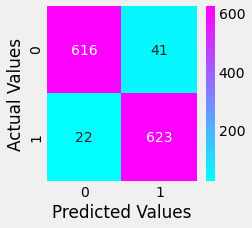

In [101]:
from sklearn.metrics import confusion_matrix, classification_report

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'cool', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [82]:
# lets take a look at the Classification Report

cr = classification_report(y_valid, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       657
           1       0.94      0.97      0.95       645

    accuracy                           0.95      1302
   macro avg       0.95      0.95      0.95      1302
weighted avg       0.95      0.95      0.95      1302



In [103]:
y_pred[0:]

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

##  So,we predicted whether an employee belonging to an organization should get a promotion or not using Logistic Regression and Decision Trees.

## We also used Feature Selection, and Hyper Parameter Tuning to Improve the Model.